Fetch and Save symbol.csv

In [6]:
import requests
import pandas as pd
import time
import os

# Step 3: Function to fetch and save stock data
def fetch_and_save_stock_data(symbol, from_date, to_date, items_per_page=50, save_folder="StockData"):
    symbol = symbol.upper()
    url = "https://www.nepalipaisa.com/api/GetStockHistory"
    page_no = 1
    all_data = []

    # Create save folder if not exists
    if not os.path.exists(save_folder):
        os.makedirs(save_folder)

    while True:
        params = {
            "stockSymbol": symbol,
            "fromDate": from_date,
            "toDate": to_date,
            "pageNo": page_no,
            "itemsPerPage": items_per_page,
            "pagePerDisplay": 10
        }

        response = requests.get(url, params=params)
        print(f"Fetching {symbol}, page {page_no} | Status: {response.status_code}")

        if response.status_code != 200:
            print(f"Failed to fetch data for {symbol}: HTTP {response.status_code}")
            break

        try:
            data = response.json()
            stock_data = data.get('result', {}).get('data', [])
        except Exception as e:
            print(f"Error reading response JSON: {e}")
            break

        if not stock_data:
            print(f"No more data found for {symbol} at page {page_no}.")
            break

        all_data.extend(stock_data)
        page_no += 1
        time.sleep(0.5)  # gentle delay between API calls

    if all_data:
        df = pd.DataFrame(all_data)
        save_path = os.path.join(save_folder, f"{symbol}.csv")
        df.to_csv(save_path, index=False)
        print(f" Data for {symbol} saved to: {save_path}")
    else:
        print(f" No data found for {symbol}")

# Step 4 & 5: User input and function call
user_symbol = input("Enter stock symbol (e.g., ADBL, NABIL): ").strip().upper()
from_date = "2020-01-01"
to_date = "2025-05-19"

fetch_and_save_stock_data(user_symbol, from_date, to_date)


Enter stock symbol (e.g., ADBL, NABIL):  NABIL


Fetching NABIL, page 1 | Status: 200
Fetching NABIL, page 2 | Status: 200
Fetching NABIL, page 3 | Status: 200
Fetching NABIL, page 4 | Status: 200
Fetching NABIL, page 5 | Status: 200
Fetching NABIL, page 6 | Status: 200
Fetching NABIL, page 7 | Status: 200
Fetching NABIL, page 8 | Status: 200
Fetching NABIL, page 9 | Status: 200
Fetching NABIL, page 10 | Status: 200
Fetching NABIL, page 11 | Status: 200
Fetching NABIL, page 12 | Status: 200
Fetching NABIL, page 13 | Status: 200
Fetching NABIL, page 14 | Status: 200
Fetching NABIL, page 15 | Status: 200
Fetching NABIL, page 16 | Status: 200
Fetching NABIL, page 17 | Status: 200
Fetching NABIL, page 18 | Status: 200
Fetching NABIL, page 19 | Status: 200
Fetching NABIL, page 20 | Status: 200
Fetching NABIL, page 21 | Status: 200
Fetching NABIL, page 22 | Status: 200
Fetching NABIL, page 23 | Status: 200
Fetching NABIL, page 24 | Status: 200
Fetching NABIL, page 25 | Status: 200
Fetching NABIL, page 26 | Status: 200
No more data found fo

In [8]:
user_symbol

'NABIL'

Data Clean

In [15]:
file_path = f"./StockData/{user_symbol}.csv"

try:
    df = pd.read_csv(file_path)
    print(df.head())
except FileNotFoundError:
    print(f"File '{file_path}' not found in your Google Drive.")

   sn            tradeDate tradeDateString  maxPrice  minPrice  closingPrice  \
0   1  2025-05-19T00:00:00      2025-05-19     488.0     479.9        482.58   
1   2  2025-05-18T00:00:00      2025-05-18     485.0     479.0        480.49   
2   3  2025-05-15T00:00:00      2025-05-15     486.0     481.5        482.11   
3   4  2025-05-14T00:00:00      2025-05-14     490.0     482.0        483.85   
4   5  2025-05-13T00:00:00      2025-05-13     493.6     481.0        487.41   

   noOfTransactions  volume      amount  previousClosing  differenceRs  \
0               419   42039  20293353.5           480.49          2.09   
1               531   37266  17902061.6           482.11         -1.62   
2               468   47247  22844525.9           483.85         -1.74   
3               354   25028  12122585.6           487.41         -3.56   
4               576   65061  31585532.7           485.65          1.76   

   percentChange  
0           0.43  
1          -0.34  
2          -0.36 

In [17]:

df.info()        # Check data types
df.isnull().sum()  # Check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sn                1203 non-null   int64  
 1   tradeDate         1203 non-null   object 
 2   tradeDateString   1203 non-null   object 
 3   maxPrice          1203 non-null   float64
 4   minPrice          1203 non-null   float64
 5   closingPrice      1203 non-null   float64
 6   noOfTransactions  1203 non-null   int64  
 7   volume            1203 non-null   int64  
 8   amount            1203 non-null   float64
 9   previousClosing   1203 non-null   float64
 10  differenceRs      1203 non-null   float64
 11  percentChange     1203 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 112.9+ KB


sn                  0
tradeDate           0
tradeDateString     0
maxPrice            0
minPrice            0
closingPrice        0
noOfTransactions    0
volume              0
amount              0
previousClosing     0
differenceRs        0
percentChange       0
dtype: int64

In [19]:
df.duplicated().sum()

0

Convert the daily to weekly format and plot it.

<Axes: title={'center': 'Weekly Close Price'}, xlabel='tradeDate'>

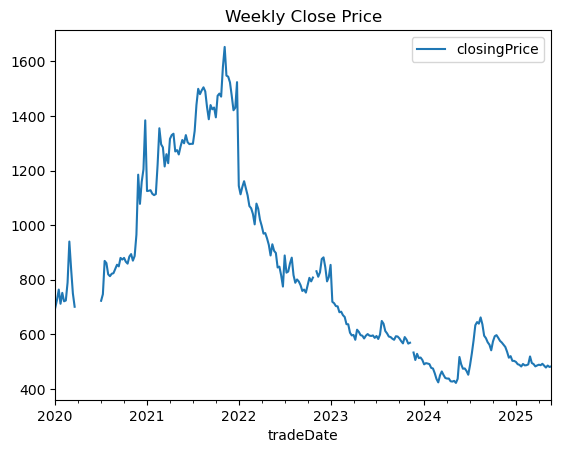

In [22]:
df['tradeDate'] = pd.to_datetime(df['tradeDate'])  # Convert it to datetime
df.set_index('tradeDate', inplace=True)            # Use it as index
weekly_df = df.resample('W').agg({'closingPrice': 'last'})
weekly_df.plot(title='Weekly Close Price')

Convert the data to montly format and plot it.

<Axes: title={'center': 'Monthly Close Price'}, xlabel='tradeDate'>

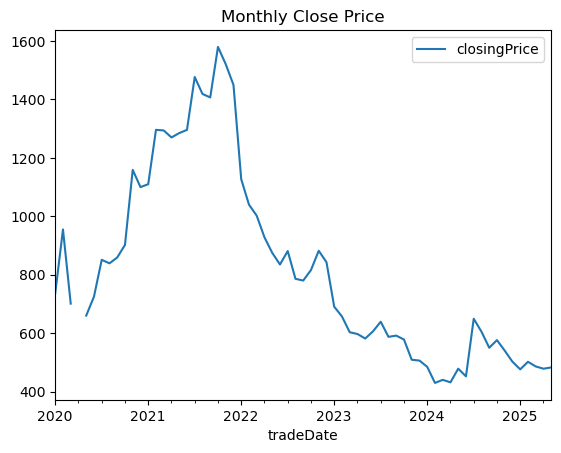

In [25]:

monthly_df = df.resample('ME').agg({'closingPrice': 'last'})
monthly_df.plot(title='Monthly Close Price')


Moving Average

<Axes: title={'center': '14-Day Moving Average'}, xlabel='tradeDate'>

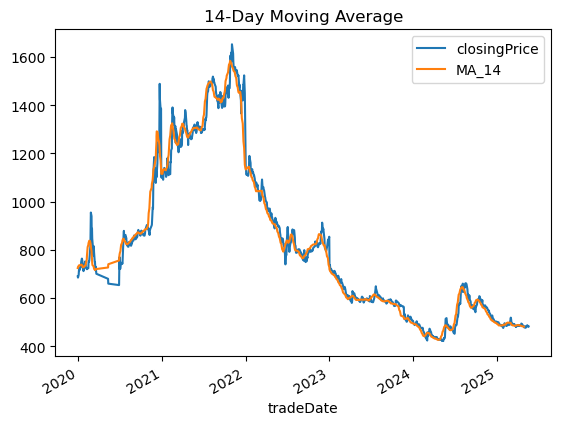

In [28]:


df['MA_14'] = df['closingPrice'].rolling(window=14).mean()
df[['closingPrice', 'MA_14']].plot(title='14-Day Moving Average')

Weighted Moving Average

<Axes: title={'center': '14-Day Weighted Moving Average'}, xlabel='tradeDate'>

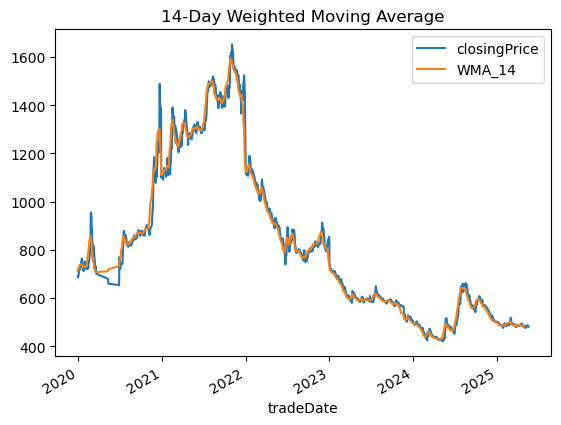

In [31]:


weights = range(1, 15)
def weighted_moving_avg(prices):
    return (prices * weights).sum() / sum(weights)


df['WMA_14'] = df['closingPrice'].rolling(window=14).apply(weighted_moving_avg, raw=True)

df[['closingPrice', 'WMA_14']].plot(title='14-Day Weighted Moving Average')

RSI

<Axes: title={'center': 'RSI (14)'}, xlabel='tradeDate'>

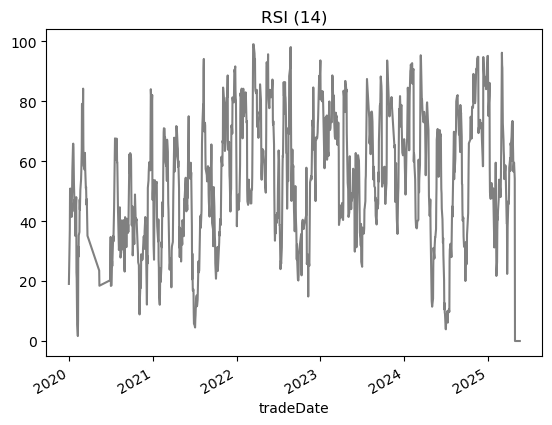

In [42]:


delta = df['closingPrice'].diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()

rs = avg_gain / avg_loss

rs = rs.replace([float('inf'), -float('inf')], 100)
rs = rs.fillna(0) # Handle cases where both avg_gain and avg_loss are 0
df['RSI'] = 100 - (100 / (1 + rs))
df['RSI'].plot(title='RSI (14)', color='Gray')

OBV

C:\Users\Acer\AppData\Local\Temp\ipykernel_17308\298626162.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['OBV'].iloc[0] = df['Volume'].iloc[0]
C:\Users\Acer\AppData\Local\Temp\ipykernel_17308\298626162.py:12: SettingWithCopyWarning

<Axes: title={'center': 'On-Balance Volume'}, xlabel='tradeDate'>

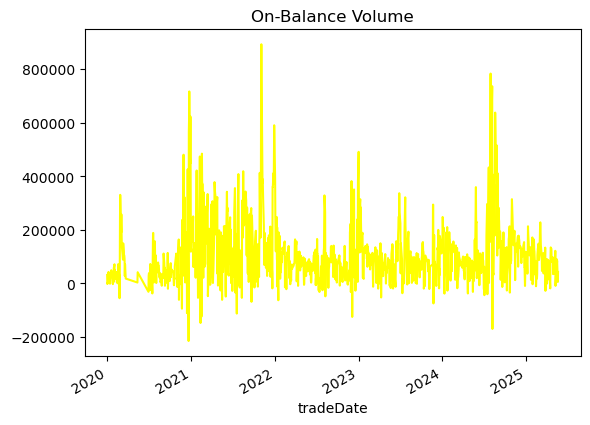

In [37]:
df['Volume'] = df['volume']
df['OBV'] = 0


price_change = df['closingPrice'].diff()


obv_volume = df['Volume'].where(price_change > 0, -df['Volume'].where(price_change < 0, 0))


if len(df) > 0:
    df['OBV'].iloc[0] = df['Volume'].iloc[0]

    df['OBV'] = obv_volume.cumsum() + df['Volume'].iloc[0] - obv_volume.iloc[0]

if len(df) > 0:
    df['OBV_calc'] = df['Volume']

    df.loc[price_change > 0, 'OBV_calc'] = df['Volume'][price_change > 0] + df['OBV_calc'].shift(1)[price_change > 0]
    df.loc[price_change < 0, 'OBV_calc'] = -df['Volume'][price_change < 0] + df['OBV_calc'].shift(1)[price_change < 0]
    df.loc[price_change == 0, 'OBV_calc'] = df['OBV_calc'].shift(1)[price_change == 0]

    # Handle the very first OBV value explicitly if it wasn't set correctly by the above
    df['OBV_calc'].iloc[0] = df['Volume'].iloc[0]

    # Now set the actual OBV column
    df['OBV'] = df['OBV_calc']
    df = df.drop(columns=['OBV_calc']) # Clean up the temporary column


df['OBV'].plot(title='On-Balance Volume', color='Yellow')

CCI

<Axes: title={'center': 'CCI (20)'}, xlabel='tradeDate'>

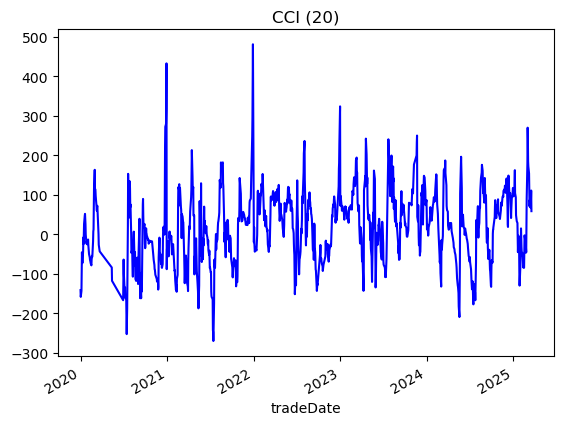

In [40]:

tp = (df['maxPrice'] + df['minPrice'] + df['closingPrice']) / 3
tp_ma = tp.rolling(20).mean()
tp_md = (tp - tp_ma).abs().rolling(20).mean()
df['CCI'] = (tp - tp_ma) / (0.015 * tp_md)
df['CCI'].plot(title='CCI (20)', color='Blue')